## Health Insurance Cross Sell Prediction

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.


## Data Dictionary

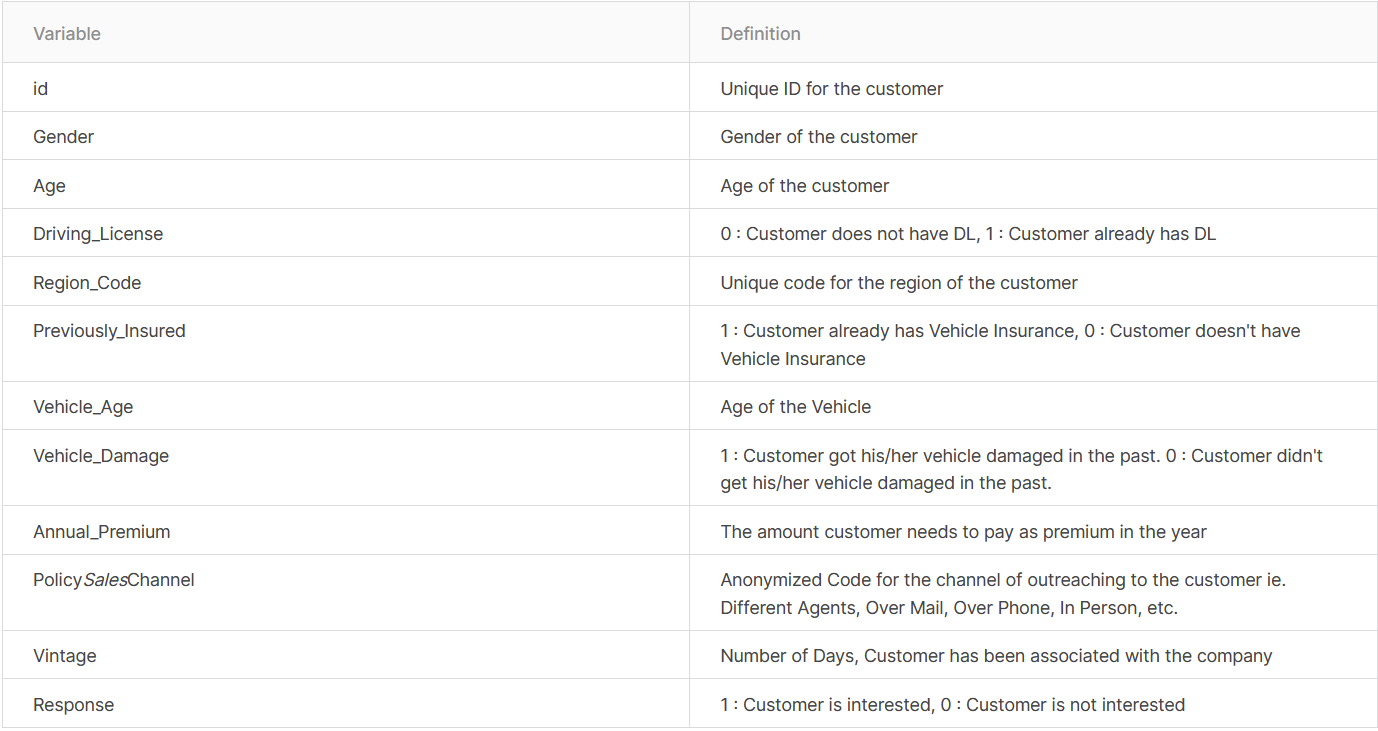

## Import Libraries

In [2]:
import warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

#preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

#Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

### Load data

In [4]:
## Loading cross-sell data

cross_sell= pd.read_csv('cross_sell.csv',index_col=['id'])
cross_sell

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0


In [3]:
## checking distribution of Response variable, it seems our Response variable is unbalanced.
cross_sell['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

### Data Preprocessing

In [4]:
# Shape of the dataset
cross_sell.shape

(381109, 11)

In [5]:
#Information about the columns
cross_sell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Gender                381109 non-null  object
 1   Age                   381109 non-null  int64 
 2   Driving_License       381109 non-null  int64 
 3   Region_Code           381109 non-null  int64 
 4   Previously_Insured    381109 non-null  int64 
 5   Vehicle_Age           381109 non-null  object
 6   Vehicle_Damage        381109 non-null  object
 7   Annual_Premium        381109 non-null  int64 
 8   Policy_Sales_Channel  381109 non-null  int64 
 9   Vintage               381109 non-null  int64 
 10  Response              381109 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 34.9+ MB


In [6]:
cross_sell.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [7]:
# changing some columns to category data
cross_sell[['Driving_License', 'Region_Code','Previously_Insured','Policy_Sales_Channel','Response']]=cross_sell[['Driving_License', 'Region_Code','Previously_Insured','Policy_Sales_Channel','Response']].astype('category')
#Information about the columns
cross_sell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Gender                381109 non-null  object  
 1   Age                   381109 non-null  int64   
 2   Driving_License       381109 non-null  category
 3   Region_Code           381109 non-null  category
 4   Previously_Insured    381109 non-null  category
 5   Vehicle_Age           381109 non-null  object  
 6   Vehicle_Damage        381109 non-null  object  
 7   Annual_Premium        381109 non-null  int64   
 8   Policy_Sales_Channel  381109 non-null  category
 9   Vintage               381109 non-null  int64   
 10  Response              381109 non-null  category
dtypes: category(5), int64(3), object(3)
memory usage: 22.5+ MB


In [8]:
# Checking is any null present in data
cross_sell.isnull().any()

Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool

In [9]:
#Basic summary statistics
cross_sell.describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


### Balancing the Data

In [10]:
class_1 = cross_sell[cross_sell['Response']==1]
class_0 = cross_sell[cross_sell['Response']==0]

In [11]:
class_1.shape

(46710, 11)

In [12]:
# oversampling the class 1
class_1_over = class_1.sample(381109,replace=True)

In [13]:
balanced_data = pd.concat([class_1_over.sample(10000),class_0.sample(10000)],axis=0)

<AxesSubplot:xlabel='Response', ylabel='count'>

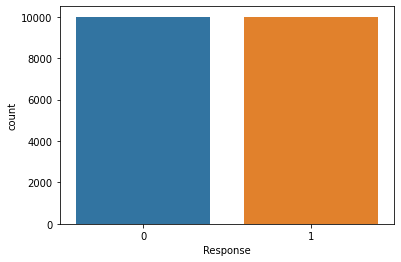

In [14]:
sns.countplot(balanced_data['Response'])

In [15]:
# creating label
label = balanced_data.pop('Response')

In [16]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 167451 to 325155
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Gender                20000 non-null  object  
 1   Age                   20000 non-null  int64   
 2   Driving_License       20000 non-null  category
 3   Region_Code           20000 non-null  category
 4   Previously_Insured    20000 non-null  category
 5   Vehicle_Age           20000 non-null  object  
 6   Vehicle_Damage        20000 non-null  object  
 7   Annual_Premium        20000 non-null  int64   
 8   Policy_Sales_Channel  20000 non-null  category
 9   Vintage               20000 non-null  int64   
dtypes: category(4), int64(3), object(3)
memory usage: 1.7+ MB


In [17]:
# Train test Split
xtrain,xtest,ytrain,ytest = train_test_split(balanced_data,label,test_size = 0.2,random_state =20 )

## Data Transformation

In [18]:


ct = ColumnTransformer(
     [("OrdinalEncoder",OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1), ['Gender', 'Vehicle_Age', 'Vehicle_Damage']),
      ("StandardScaler", StandardScaler(),['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'])])

In [19]:

xtrain = ct.fit_transform(xtrain)
xtest = ct.transform(xtest)
ytrain,ytest = ytrain,ytest

## Modelling

In [20]:
classifier = []
roc_score = []


### Logistic Regression

In [21]:
clf = LogisticRegression(solver='lbfgs', max_iter=110)

clf.fit(xtrain, ytrain)
    
y_pred_tr = clf.predict(xtrain)
roc_auc_train = roc_auc_score(ytrain, y_pred_tr)
print('Training roc_auc Score: ',roc_auc_train)
print("="*80)
print('Classification Report Training :\n',classification_report(ytrain, y_pred_tr))
print("="*80)
y_pred = clf.predict(xtest)
roc_auc_test = roc_auc_score(ytest, y_pred)
print('Testing roc_auc Score: ',roc_auc_test)
print('Classification Report Testing :\n',classification_report(ytest, y_pred))

classifier.append(clf),roc_score.append(roc_auc_test)

Training roc_auc Score:  0.7873592553895812
Classification Report Training :
               precision    recall  f1-score   support

           0       0.96      0.60      0.74      7994
           1       0.71      0.98      0.82      8006

    accuracy                           0.79     16000
   macro avg       0.83      0.79      0.78     16000
weighted avg       0.83      0.79      0.78     16000

Testing roc_auc Score:  0.7855800702206319
Classification Report Testing :
               precision    recall  f1-score   support

           0       0.97      0.59      0.73      2006
           1       0.70      0.98      0.82      1994

    accuracy                           0.79      4000
   macro avg       0.84      0.79      0.78      4000
weighted avg       0.84      0.79      0.78      4000



(None, None)

### Gaussian Naive Bayes

In [22]:
clf = GaussianNB()
clf.fit(xtrain, ytrain)
y_pred_tr = clf.predict(xtrain)
roc_auc_train = roc_auc_score(ytrain, y_pred_tr)
print('Training roc_auc Score: ',roc_auc_train)
print("="*80)
print('Classification Report Training :\n',classification_report(ytrain, y_pred_tr))
print("="*80)
y_pred = clf.predict(xtest)
roc_auc_test = roc_auc_score(ytest, y_pred)
print('Testing roc_auc Score: ',roc_auc_test)
print('Classification Report Testing :\n',classification_report(ytest, y_pred))

classifier.append(clf),roc_score.append(roc_auc_test)

Training roc_auc Score:  0.7872967084793985
Classification Report Training :
               precision    recall  f1-score   support

           0       0.96      0.60      0.74      7994
           1       0.71      0.98      0.82      8006

    accuracy                           0.79     16000
   macro avg       0.83      0.79      0.78     16000
weighted avg       0.83      0.79      0.78     16000

Testing roc_auc Score:  0.7853308179773619
Classification Report Testing :
               precision    recall  f1-score   support

           0       0.97      0.59      0.73      2006
           1       0.70      0.98      0.82      1994

    accuracy                           0.78      4000
   macro avg       0.84      0.79      0.78      4000
weighted avg       0.84      0.78      0.78      4000



(None, None)

### AdaBoost 

In [23]:

clf = AdaBoostClassifier(random_state = 42)
clf.fit(xtrain, ytrain)
y_pred_tr = clf.predict(xtrain)
roc_auc_train = roc_auc_score(ytrain, y_pred_tr)
print('Training roc_auc Score: ',roc_auc_train)
print("="*80)
print('Classification Report Training :\n',classification_report(ytrain, y_pred_tr))
print("="*80)
y_pred = clf.predict(xtest)
roc_auc_test = roc_auc_score(ytest, y_pred)
print('Testing roc_auc Score: ',roc_auc_test)
print('Classification Report Testing :\n',classification_report(ytest, y_pred))

classifier.append(clf),roc_score.append(roc_auc_test)

Training roc_auc Score:  0.7982192458733258
Classification Report Training :
               precision    recall  f1-score   support

           0       0.90      0.67      0.77      7994
           1       0.74      0.92      0.82      8006

    accuracy                           0.80     16000
   macro avg       0.82      0.80      0.80     16000
weighted avg       0.82      0.80      0.80     16000

Testing roc_auc Score:  0.7928806359257234
Classification Report Testing :
               precision    recall  f1-score   support

           0       0.89      0.67      0.76      2006
           1       0.73      0.92      0.82      1994

    accuracy                           0.79      4000
   macro avg       0.81      0.79      0.79      4000
weighted avg       0.81      0.79      0.79      4000



(None, None)

### RandomForest

In [24]:
clf = RandomForestClassifier(random_state = 42)
clf.fit(xtrain, ytrain)
y_pred_tr = clf.predict(xtrain)
roc_auc_train = roc_auc_score(ytrain, y_pred_tr)
print('Training roc_auc Score: ',roc_auc_train)
print("="*80)
print('Classification Report Training :\n',classification_report(ytrain, y_pred_tr))
print("="*80)
y_pred = clf.predict(xtest)
roc_auc_test = roc_auc_score(ytest, y_pred)
print('Testing roc_auc Score: ',roc_auc_test)
print('Classification Report Testing :\n',classification_report(ytest, y_pred))

classifier.append(clf),roc_score.append(roc_auc_test)

Training roc_auc Score:  1.0
Classification Report Training :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7994
           1       1.00      1.00      1.00      8006

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000

Testing roc_auc Score:  0.7975459279133512
Classification Report Testing :
               precision    recall  f1-score   support

           0       0.87      0.70      0.78      2006
           1       0.75      0.90      0.82      1994

    accuracy                           0.80      4000
   macro avg       0.81      0.80      0.80      4000
weighted avg       0.81      0.80      0.80      4000



(None, None)

### GradientBoosting

In [25]:
clf = GradientBoostingClassifier(random_state = 42)
clf.fit(xtrain, ytrain)
y_pred_tr = clf.predict(xtrain)
roc_auc_train = roc_auc_score(ytrain, y_pred_tr)
print('Training roc_auc Score: ',roc_auc_train)
print("="*80)
print('Classification Report Training :\n',classification_report(ytrain, y_pred_tr))
print("="*80)
y_pred = clf.predict(xtest)
roc_auc_test = roc_auc_score(ytest, y_pred)
print('Testing roc_auc Score: ',roc_auc_test)
print('Classification Report Testing :\n',classification_report(ytest, y_pred))

classifier.append(clf),roc_score.append(roc_auc_test)

Training roc_auc Score:  0.8068495944778971
Classification Report Training :
               precision    recall  f1-score   support

           0       0.90      0.69      0.78      7994
           1       0.75      0.92      0.83      8006

    accuracy                           0.81     16000
   macro avg       0.82      0.81      0.80     16000
weighted avg       0.82      0.81      0.80     16000

Testing roc_auc Score:  0.7981179330613976
Classification Report Testing :
               precision    recall  f1-score   support

           0       0.90      0.68      0.77      2006
           1       0.74      0.92      0.82      1994

    accuracy                           0.80      4000
   macro avg       0.82      0.80      0.79      4000
weighted avg       0.82      0.80      0.79      4000



(None, None)

## Selecting Best estimator

In [26]:
estimater_score = {'Classifier':classifier,'Score':roc_score}
est = pd.DataFrame(estimater_score).sort_values('Score',ascending=False)

## Model Prediction on Test data

In [27]:
test_data = pd.read_csv('test.csv',index_col=['id'])
test_data = ct.transform(test_data)

In [28]:
est['Classifier'].values[0].predict(test_data)

array([0, 1, 1, ..., 0, 0, 0])